# Financial Data - Preliminary Analysis

---

Preliminary exploration of APIs and defining useful concepts.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

## Data Download

Use Yahoo Finance for ease.


In [2]:
tickers = [
    "AAPL",  # Apple Inc.
    "TSLA",  # Tesla Inc.
    "GOOG",  # Alphabet Inc.
    "MSFT",  # Microsoft Corporation
    "NVDA",  # NVIDIA Corporation
    "SPY",  # SPDR S&P 500 ETF Trust
    "QQQ",  # Invesco QQQ Trust
    "IWM",  # iShares Russell 2000 ETF
    "GLD",  # SPDR Gold Shares
    "TLT",  # iShares 20+ Year Treasury Bond ETF
]

data = yf.download(tickers, start="2010-01-01", end="2023-01-01")
close = data.Close
data.head(5)

/tmp/ipykernel_3691/1085590896.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2010-01-01", end="2023-01-01")


[                       0%                       ]

[**********            20%                       ]  2 of 10 completed

[**************        30%                       ]  3 of 10 completed

[*******************   40%                       ]  4 of 10 completed

[**********************50%                       ]  5 of 10 completed

[**********************60%****                   ]  6 of 10 completed

[**********************70%*********              ]  7 of 10 completed

[**********************80%*************          ]  8 of 10 completed

[**********************90%******************     ]  9 of 10 completed

[*********************100%***********************]  10 of 10 completed

Price          Close                                                         \
Ticker          AAPL         GLD       GOOG        IWM       MSFT      NVDA   
Date                                                                          
2010-01-04  6.418383  109.800003  15.494032  51.457924  23.130060  0.423807   
2010-01-05  6.429480  109.699997  15.425800  51.281006  23.137524  0.429995   
2010-01-06  6.327210  111.510002  15.036937  51.232742  22.995533  0.432746   
2010-01-07  6.315513  110.820000  14.686883  51.610748  22.756380  0.424265   
2010-01-08  6.357500  111.370003  14.882676  51.892242  22.913321  0.425182   

Price                                             ...     Volume            \
Ticker            QQQ        SPY        TLT TSLA  ...       AAPL       GLD   
Date                                              ...                        
2010-01-04  40.341606  85.027939  56.763206  NaN  ...  493729600  16224100   
2010-01-05  40.341606  85.253052  57.129742  NaN  ...  601904800  14213100   
2010-01-06  40.098263  85.313042  56.364979  NaN  ...  552160000  24981900   
2010-01-07  40.124325  85.673180  56.459789  NaN  ...  477131200  13609800   
2010-01-08  40.454578  85.958298  56.434483  NaN  ...  447610800  15894600   

Price                                                                      \
Ticker           GOOG       IWM      MSFT       NVDA       QQQ        SPY   
Date                                                                        
2010-01-04   78541293  42863900  38409100  800204000  62822800  118944600   
2010-01-05  120638494  55523100  49749600  728648000  62935600  111579900   
2010-01-06  159744526  59708600  58182400  649168000  96033000  116074400   
2010-01-07  257533695  56123500  50559700  547792000  77094100  131091100   
2010-01-08  189680313  48811500  51197400  478168000  88886600  126402800   

Price                     
Ticker          TLT TSLA  
Date                      
2010-01-04  2829100  NaN  
2010-01-05  2841600  NaN  
2010-01-06  4099600  NaN  
2010-01-07  2793200  NaN  
2010-01-08  2910700  NaN  

[5 rows x 50 columns]

## Returns

We use log returns:
$$
r_t = \log\left(\frac{P_t}{P_{t-1}}\right)
$$

This has a multitude of benefits:
1. Adding returns is easy:
$$ 
\sum_{t=1}^n r_t = \sum_{t=1}^n \log\left(\frac{P_t}{P_{t-1}}\right) = \sum_{t=1}^n \log(P_t) - \log(P_{t-1}) = \log(P_n) - \log(P_0)
$$
2. Symmetry:
Log returns are symmetric: $\log{\left(\frac{110}{100}\right)} = -\log{\left(\frac{100}{110}\right)}$. Simple returns don't have this property.

In [3]:
log_returns = np.log(close / close.shift(1)).dropna() * 100
simple_returns = close.pct_change().dropna() * 100

In [4]:
log_returns.head(5)

Ticker,AAPL,GLD,GOOG,IWM,MSFT,NVDA,QQQ,SPY,TLT,TSLA
Date,,,,,,,,,,
2010-06-30,-1.827943,0.337521,-2.070758,-1.154973,-1.295307,-2.610123,-1.533517,-0.954499,0.670626,-0.251464
2010-07-01,-1.219933,-3.887889,-1.234690,-0.722502,0.649751,1.651313,-0.281318,-0.446691,0.157593,-8.172292
2010-07-02,-0.621693,1.231279,-0.671205,-1.098933,0.473843,-1.260323,-0.282173,-0.546431,-0.800367,-13.431235
2010-07-06,0.682021,-1.685143,-0.110026,-1.312460,2.336044,-1.078976,0.305656,0.653395,0.820017,-17.547006
2010-07-07,3.958699,1.041677,3.188922,3.429661,1.995085,4.719260,3.142568,3.101041,-1.177862,-1.943053


In [5]:
simple_returns.head(5)

Ticker,AAPL,GLD,GOOG,IWM,MSFT,NVDA,QQQ,SPY,TLT,TSLA
Date,,,,,,,,,,
2010-06-30,-1.811338,0.338092,-2.049465,-1.148328,-1.286954,-2.576354,-1.521818,-0.949958,0.672880,-0.251148
2010-07-01,-1.212522,-3.813280,-1.227099,-0.719898,0.651866,1.665023,-0.280923,-0.445694,0.157718,-7.847274
2010-07-02,-0.619765,1.238890,-0.668958,-1.092917,0.474967,-1.252414,-0.281776,-0.544941,-0.797173,-12.568307
2010-07-06,0.684352,-1.671024,-0.109965,-1.303885,2.363543,-1.073176,0.306124,0.655534,0.823388,-16.093748
2010-07-07,4.038099,1.047121,3.240313,3.489153,2.015120,4.832390,3.192468,3.149624,-1.170953,-1.924298


In [6]:
def plot_returns(returns: pd.DataFrame, return_type: str = "Log Returns"):
    _fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()  # Make 1D for easy indexing

    for i, ticker in enumerate(tickers):
        ax = axes[i]
        sns.histplot(returns[ticker], bins=50, kde=True, ax=ax, alpha=0.8)
        ax.set_title(f"{ticker}\n(std={returns[ticker].std():.1f}%)")
        ax.grid(True, alpha=0.3)

    plt.suptitle(f"{return_type} Distributions", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

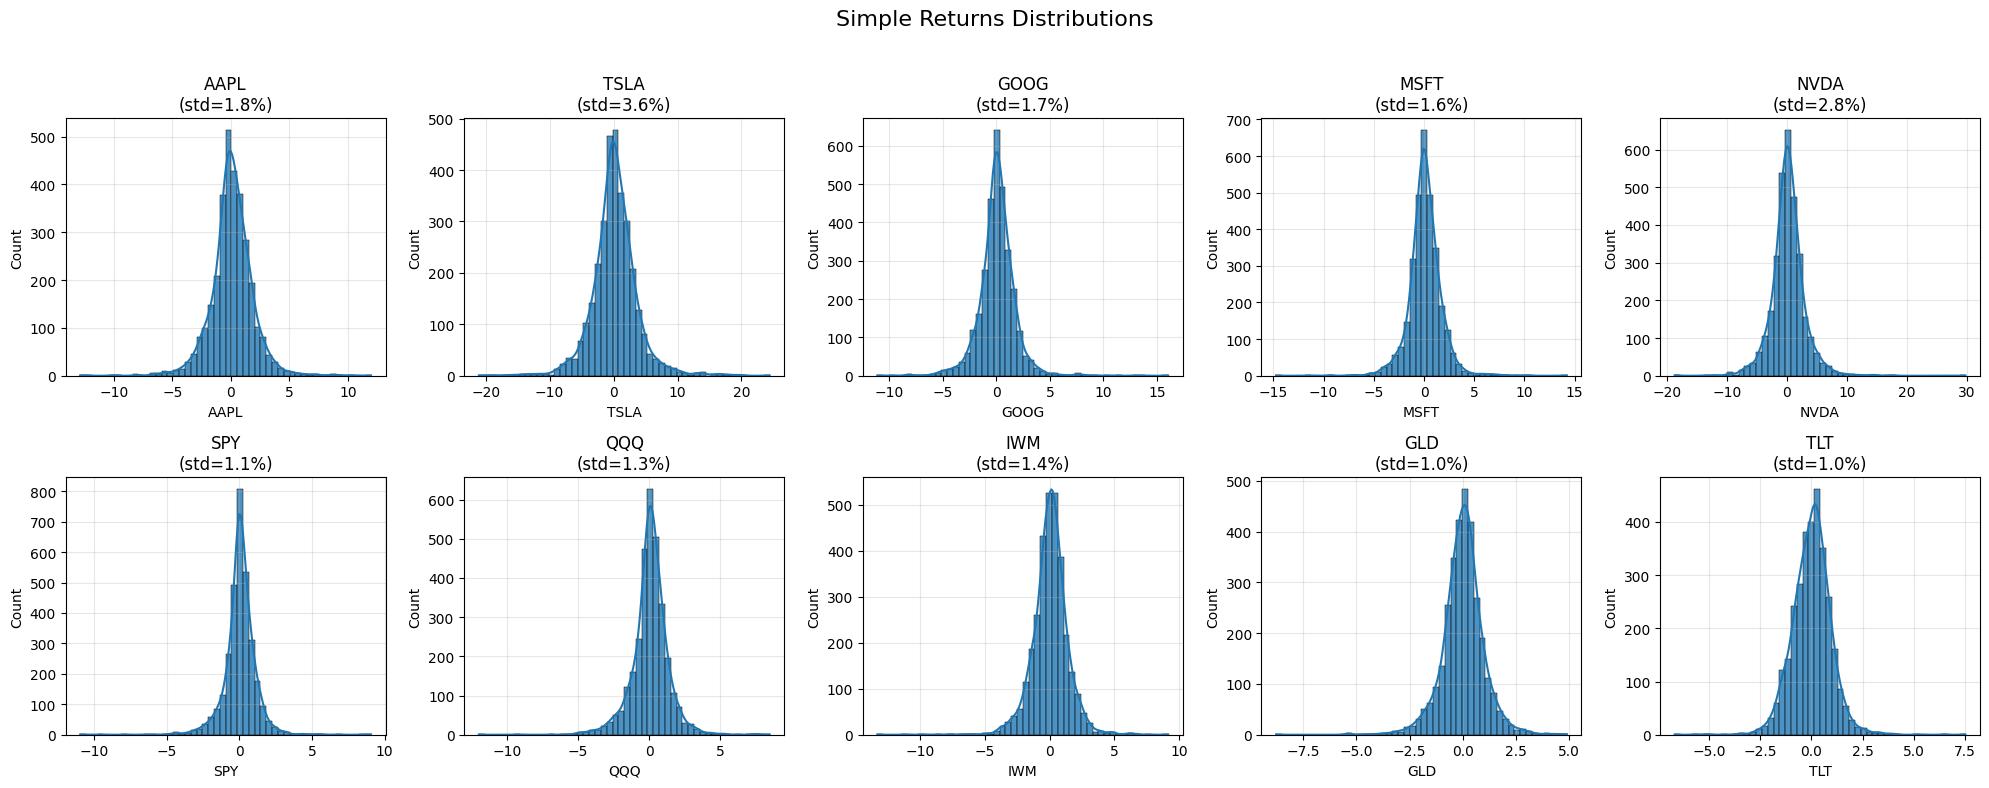

In [7]:
plot_returns(simple_returns, return_type="Simple Returns")

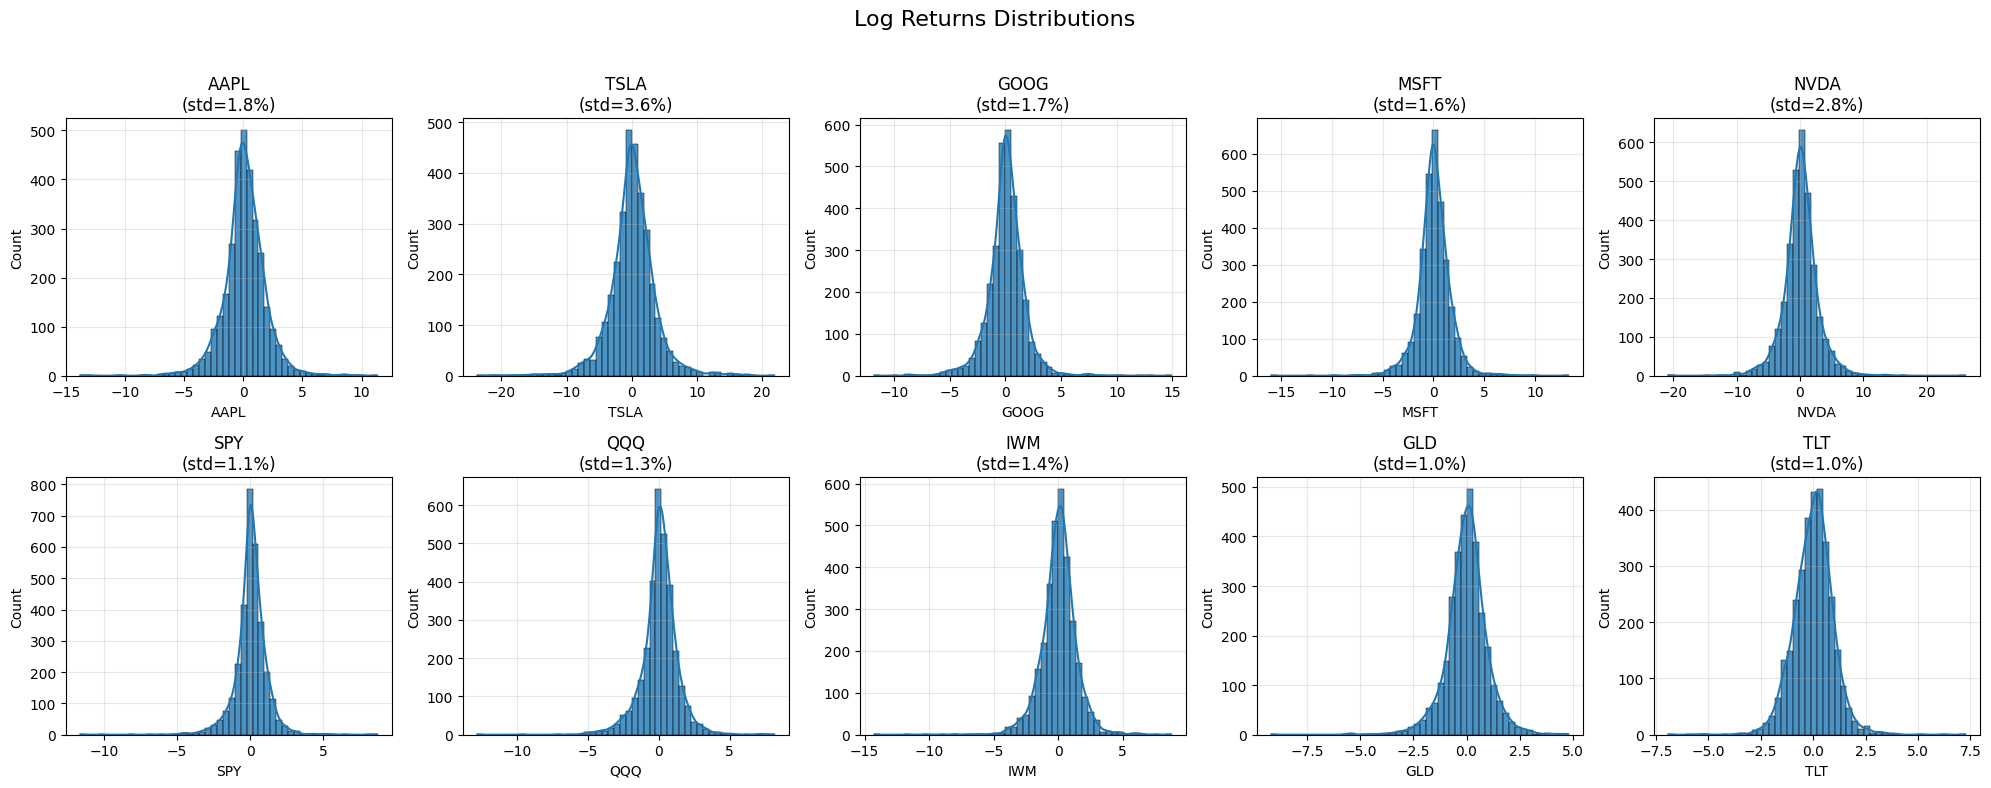

In [8]:
plot_returns(log_returns)

In [9]:
def rolling_sharpe(
    returns: pd.DataFrame,
    window: int = 252,
    risk_free_annual: float = 0.02,
    periods_per_year: int = 252,
) -> pd.DataFrame:
    """
    Computes rolling annualized Sharpe ratio for each ticker.

    The Sharpe ratio is defined as the ratio of the average excess return
    (over the risk-free rate) to the standard deviation of excess returns.
    This function calculates the rolling Sharpe ratio over a specified window.
    1. Convert annual risk-free rate to daily.
    2. Compute excess returns by subtracting daily risk-free rate.
    3. Calculate rolling mean and std deviation of excess returns.
    4. Compute rolling Sharpe ratio and annualize it.
    5. Return a DataFrame of rolling annualized Sharpe ratios.
    """
    rf_daily = (1 + risk_free_annual) ** (1 / periods_per_year) - 1
    excess = returns - rf_daily
    roll_mean = excess.rolling(window).mean()
    roll_std = excess.rolling(window).std(ddof=1)
    sharpe_raw = roll_mean / roll_std
    sharpe_annual = sharpe_raw * np.sqrt(periods_per_year)
    return sharpe_annual

In [10]:
sharpe = rolling_sharpe(log_returns, window=252)
sharpe[sharpe > 0].dropna()

Ticker,AAPL,GLD,GOOG,IWM,MSFT,NVDA,QQQ,SPY,TLT,TSLA
Date,,,,,,,,,,
2011-07-08,1.545778,1.683503,0.511049,1.555830,0.667656,0.811585,1.845641,1.743452,0.016041,0.872861
2011-07-11,1.509364,1.808719,0.406476,1.498940,0.493769,0.700565,1.696575,1.589928,0.114983,0.880402
2011-07-12,1.617579,1.802937,0.348509,1.331239,0.413312,0.602453,1.568159,1.456954,0.193049,0.766131
2011-07-13,1.655124,1.866834,0.362587,1.392799,0.367132,0.578006,1.562644,1.481685,0.146355,0.646385
2011-07-19,1.917709,1.994259,0.835767,1.517971,0.532578,0.579056,1.731370,1.632762,0.067771,0.566862
...,...,...,...,...,...,...,...,...,...,...
2021-02-11,1.080938,0.734000,0.811151,0.751586,0.658416,1.367192,0.998690,0.487189,0.243826,1.951656
2021-02-12,1.100075,0.691040,0.827015,0.752080,0.675412,1.344919,1.017571,0.504863,0.167433,1.905435
2021-02-16,1.064307,0.597471,0.838010,0.746128,0.643355,1.278207,1.002147,0.497575,0.075487,1.881194


## Covariance Matrix

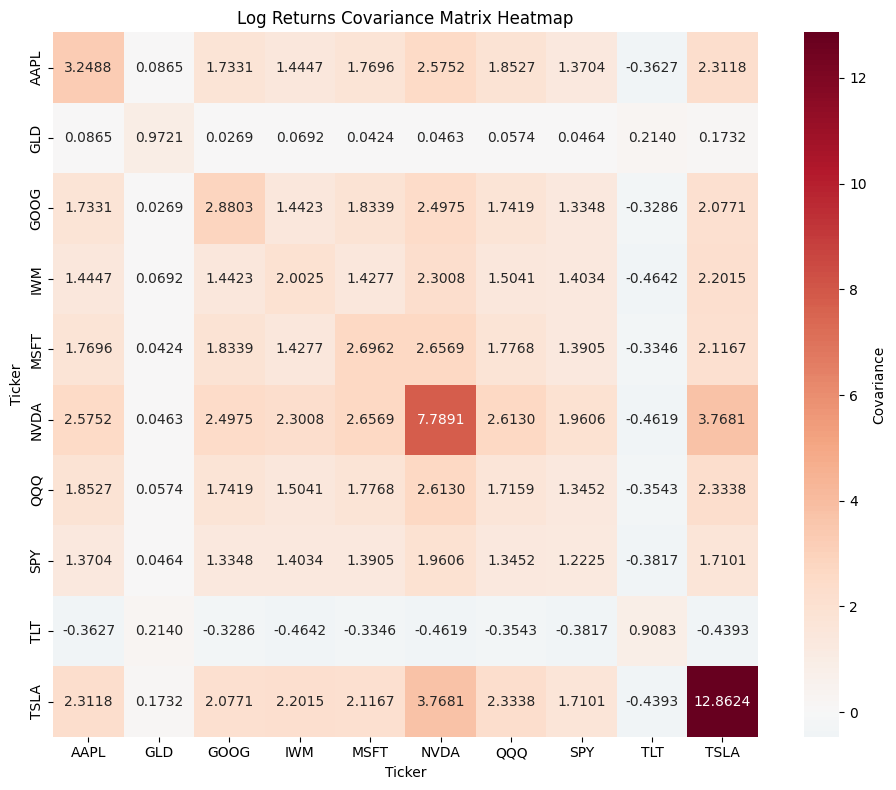

In [11]:
# Compute covariance matrix
cov_matrix = log_returns.cov()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    cov_matrix,
    annot=True,
    cmap="RdBu_r",  # Red=positive, Blue=negative
    center=0,
    fmt=".4f",
    square=True,
    cbar_kws={"label": "Covariance"},
)
plt.title("Log Returns Covariance Matrix Heatmap")
plt.tight_layout()
plt.show()